<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_03_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------

**COPYRIGHT NOTICE:** This Jupyterlab/Colab notebook is a companion supplement to the textbook _Principles of Biostatistics_ by M. Pagano. K. Marcello and H. Mattie (3rd ed) published in 2022 by CRC Press. It is designed to be used in conjunction with -- not as a standalone substitute for – this textbook.  

This notebook is licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at
>http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 5853: Biostatistics**

##### **Module 3: Inference**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 3 Material

* Part 3.1: Confidence Intervals
* Part 3.2: Hypothesis Testing
* Part 3.3: Comparison of Two Means
* Part 3.4: Analysis of Variance (ANOVA)
* Part 3.5: Nonparametric Methods
* Part 3.6: Inference on Proportions
* Part 3.7: Contingency Tables
* **Part 3.8: Correlation**
* Part 3.9: Simple Linear Regression
* Part 3.10: Multiple Linear Regression
* Part 3.11: Logistic Regression
* Part 3.12: Survival Analysis

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CELL FIRST
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# **Part 3.8: Correlation**

**_Correlation_** in statistics measures the strength and direction of the relationship between two variables. When two variables are correlated, changes in one variable tend to be associated with changes in the other. Correlation coefficients, ranging from -1 to 1, quantify this relationship:

* **1** indicates a perfect positive correlation (both variables move in the same direction).

* **-1** indicates a perfect negative correlation (variables move in opposite directions).

* **0** indicates no correlation.

#### **Importance in Biostatistics**

1. **Identifying Relationships:** Correlation helps identify relationships between biological variables, such as the association between a risk factor and disease.

2. **Predictive Analysis:** Helps in predicting outcomes. For example, knowing the correlation between age and blood pressure can aid in anticipating health issues.

3. **Experimental Design:** Understanding correlations can inform the design of experiments and studies, ensuring relevant variables are considered.

4. **Data Interpretation:** Helps in interpreting complex biological data, distinguishing significant relationships from random noise.


### **Introduction**

In the preceding chapters, we discuss measures of the strength of association between two dichotomous random variables. We now begin to investigate the relationships that can exist among  continuous variables. One statistical technique often used to measure such an association is known as **_correlation analysis_**. Correlation is defined as the quantification of the degree to which two continuous random variables are related, provided that the relationship is linear. 

>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 381). CRC Press. Kindle Edition. 

## **Datasets for this Lesson**

In this lesson we will be using 3 datasets that we need to read from the course file server. 

### Example 1: Read Datafile

We will be using a datafile called `dpt_mortality.csv` stored on the course HTTPS server. As the file is read, the data is stored in a DataFrame called `dptDF`.

_Data Description:_

This file has data from 20 countries around the world on the percentage of children who received all three doses of the DPT vaccine. The DPT vaccine (also known as DTaP or DTP) is a combination vaccine that protects against three serious bacterial infections: diphtheria, tetanus, and pertussis (whooping cough). The DPT vaccine is important because it helps prevent these diseases, which can be life-threatening, especially for young children. By getting vaccinated, individuals not only protect themselves but also contribute to community immunity, helping to prevent outbreaks and protect those who cannot be vaccinated.

In [2]:
# Example 1: Read datafile

import pandas as pd

# Read datafile and create DataFrame 
dptDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/dpt_mortality.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(dptDF)

,country,immunized,under5
1,Bolivia,83,27
2,Brazil,83,14
3,Cambodia,92,28
...,...,...,...
18,Senegal,81,44
19,Turkey,98,11
20,United Kingdom,94,4


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image06.png)

The contents of this dataset is shown in **Table 16.1** in your textbook on page 382.

### **Exercise 1A: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `drivers.csv` stored on the course HTTPS server. As the file is read, store it in a new Pandas DataFrame called `driveDF`.

_Data Description:_

This file contains data on fatal motor vechicle crashes between 2014-2015 for different age groups.


In [3]:
# Example 1: Read datafile

import pandas as pd

# Read datafile and create DataFrame 
driveDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/drivers.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(driveDF)

,miles,age_cat,age
1,6.22,0,"""16-19"""
2,4.14,1,"""20-29"""
3,1.20,2,"""30-39"""
...,...,...,...
6,1.04,5,"""60-69"""
7,1.79,6,"""70-79"""
8,3.85,7,"""80+"""


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image05.png)

If your code is correct, new DataFrame `driveDF` has total of 8 records.

### **Exercise 1B: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `fvc_fev.csv` stored on the course HTTPS server. As the file is read, store it in a new Pandas DataFrame called `lungDF`.

#### **Data Description**

In pulmonary physiology, the abbreviation _fvc_ stands for "forced vital capacity" while the abbreviation _fev_ stands for "forced expiratory volume". Both of these are important measures of lung function.

These data came from a study investigating the physical effects of sulfur dioxide exposure. Forced vital capacity is the volume of air that can be expelled from the lungs in six seconds, and forced expiratory volume in one second is the volume that can be expelled after one second of constant effort.

In [4]:
# Insert your code for Exercise 1B here

import pandas as pd

# Read the datafile 
lungDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/fvc_fev.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 3) 

# Display DataFrame
display(lungDF)

,subject_id,fev,fvc
1,1,4.7,5.8
2,2,4.3,5.1
3,3,3.5,4.1
...,...,...,...
17,17,3.0,3.8
18,18,4.5,5.8
19,19,2.4,4.1


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image12.png)

If your code was corrct, your new DataFrame `lungDF` have a total of 20 records of _fev_ values in the column **fev** and 20 records of _fvc_ values on column **fvc** . 

## **Two-Way Scatter Plot** 

From your textbook:
>Suppose that we are interested in a pair of continuous random variables, each of which is measured on the same set of persons, hospitals, countries, or other units of study. For example, we might wish to investigate the relationship between the percentage of children who have been immunized against the infectious diseases diphtheria, pertussis, and tetanus (dpt) in a given country, and the corresponding mortality rate for children under 5 years of age. The United Nations Children’s Fund considers the under-5 mortality rate to be one of the most important indicators of the level of well-being for a  population of children. The data for a sample of 20 countries from around the world are shown in Table 16.1. If X represents the percentage of children receiving all three of the required doses of the dpt vaccine, and Y represents the under-5 mortality rate, we have a pair of outcomes (xi, yi) for each nation in the sample. The first country on the list, Bolivia, has a dpt immunization percentage of 83% and an under-5 mortality rate of 27 per 1000 live births; therefore, this country is represented by the data  point (83, 27).
>
>Before we conduct any type of analysis of these data, we should always create a **_two-way scatter plot_**. If we place the outcomes of the X variable along the horizontal axis and the outcomes of the Y variable along the vertical axis, each point on the graph represents a combination of values (xi, yi). We can often determine whether a relationship exists between x and y – the outcomes of the random variables X and Y – simply by examining the graph. As an example, the data from Table 16.1 are plotted in Figure 16.1. The percentage of children immunized against dpt is shown on the horizontal  axis and the under-5 mortality rate on the vertical axis. Not surprisingly, the mortality rate tends to decrease as the percentage of children immunized increases. 

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image02.png)

**FIGURE 16.1**  Under-5 mortality rate versus percentage of children immunized against dpt for 20 countries, 2018 


### Example 2: Two-Way Scatter Plot

We have previously looked at two-way scatter plots in Lesson_01_4 (Example 10). 

Two-way scatter plots--also called X-Y Scatter plots--are quite common in biological and medical literature. The code in the cell below, shows how to recreate **Figure 16.1** using Python. 

_Code Description:_

The code first extracts the x- and y-values from the DataFrame `dptDF` as shown in this code chunk:

~~~text
# Assign x and y
x=np.array([dprDF.immunized])
y=np.array([dptDF.under5])
~~~

Here is the code chunk that actually generated the two-way scatter plot:

~~~text
# Plot xy scatter
ax.scatter(x, y, marker="o", 
           s=30,
           c='white',
           edgecolors='k')
~~~

Here is a complete list of arugments that you can use with the command `ax.scatter()` to modify various aspects of your plot:

The `ax.scatter()` method in Matplotlib is used to create scatter plots. The method's arguments include data points, colors, sizes, and more. Here's a breakdown:

* **x:** X-coordinates of the data points.
* **y:** Y-coordinates of the data points.
* **s:** Sizes of the data points.
* **c:** Colors of the data points.
* **cmap:** Colormap used to map data values to colors.
* **marker:** Marker style for the points.
* **alpha:** Transparency level of the points.
* **linewidths:** Width of the edge lines around the points.
* **edgecolors:** Colors of the edge lines around the points.



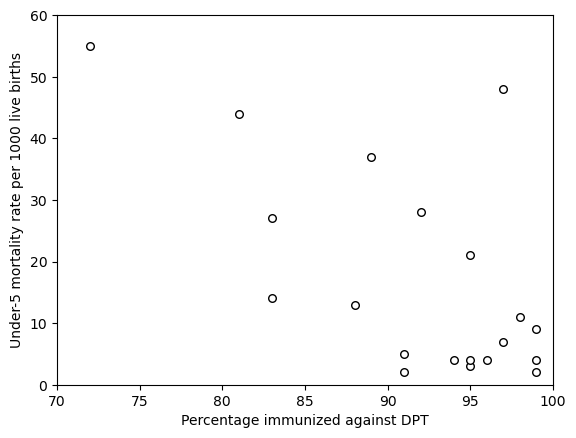

In [5]:
# Example 2: Two-way scatter plot 

import matplotlib.pyplot as plt
import numpy as np

# Assign x and y
x=np.array([dptDF.immunized])
y=np.array([dptDF.under5])

# Create plotting environment
fig, ax = plt.subplots()

# Plot xy scatter
ax.scatter(x, y, marker="o", 
           s=30,
           c='white',
           edgecolors='k')

# Set x and y limits
ax.set(xlim=(70,100))
ax.set(ylim=(0,60))

# Set the x and y labels
ax.set_xlabel('Percentage immunized against DPT')
ax.set_ylabel('Under-5 mortality rate per 1000 live births')

# Show plot
plt.show()


If the code is correct, you should see the following x-y plot.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image07.png)

By visual inspection, you should see that there is a relationship ("correlation") between the under 5 mortality rate and the percentage of children receiving the DTP vaccine. Specifically, as the percentage of children immunized increases, child mortality falls. This represents an **_inverse_** or negative correlation.  

### **Exercise 2: Two-Way Scatter Plot**

In the cell below, create a two-way scatterplot of forced vital capacity (fvc) as a function of forced expiratory volumne (fev). Whenever you see plot "$A$ as a _function_ of $B$" it means $A$ should be the y-value and $B$ should be the x-value.   

_Code Hints:_

You can use this code chunk to extract the x- and y-values from the DataFrame `lungDF` as shown in this code chunk:

~~~text
# Assign x and y
x=np.array([lungDF.fev])
y=np.array([lungDF.fvc])
~~~

You will also need to adjust the x and y limits as follows:

~~~text
# Set x and y limits
ax.set(xlim=(0,6))
ax.set(ylim=(0,7))
~~~

Finally, change the x and y axis labels as follows:

~~~text
# Set the x and y labels
ax.set_xlabel('Forced expiratory volume in one second (liters)')
ax.set_ylabel('Forced vital capacity (liters)')
~~~



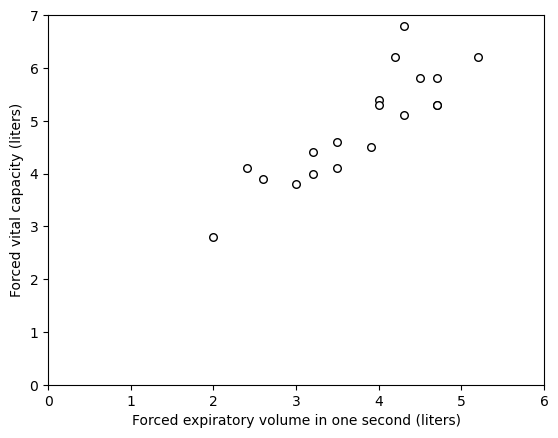

In [6]:
# Insert your code for Exercise 2 here

import matplotlib.pyplot as plt
import numpy as np

# Assign x and y
x=np.array([lungDF.fev])
y=np.array([lungDF.fvc])

# Create plotting environment
fig, ax = plt.subplots()

# Plot xy scatter
ax.scatter(x, y, marker="o", 
           s=30,
           c='white',
           edgecolors='k')

# Set x and y limits
ax.set(xlim=(0,6))
ax.set(ylim=(0,7))

# Set the x and y labels
ax.set_xlabel('Forced expiratory volume in one second (liters)')
ax.set_ylabel('Forced vital capacity (liters)')

# Show plot
plt.show()


If your code is correct, you should see the following x-y plot.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image13.png)

By visual inspection, you should see that there is very strong positive correlation, $r$, between forced expiratory volume (fev) and forced vital capacity (fvc). 

### **Interpreting Two-Way Scatterplots**

The human visual system is extremely good at detecting spatial relations. As a biostatistician, you need to take advantage of this trait.  **Figure 16.2** (below) illustrates possible relationships between $X$ and $Y$. While plots _a_ and _b_ show perfect linear relationships (_r_ = 1, and -1 respectively), the data in _c_ and _d_ show no evidence of a linear relationship (_r_=0).

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image03.png)

**FIGURE 16.2**  Scatter plots displaying possible relationships between X and Y: (a) perfect positive correlation, (b)  perfect negative correlation, (c) no correlation, (d) no correlation 

## **Pearson Correlation Coefficient**  

_From your textbook on page 382:_

In the underlying population from which the sample of points ($x_i$, $y_i$) is selected, the correlation between the random variables $X$ and $Y$ is denoted by the Greek letter $\rho$ (rho). The correlation $\rho$ quantifies the strength of the linear relationship between the outcomes $x$ and $y$. It can be thought of as the average of the product of the standard normal deviates of X and Y; in particular,  

$$ \rho = \text{average} \left[ \frac{(X - \mu_x)(Y - \mu_y)}{\sigma_x \sigma_y} \right].$$


The estimator of $\rho$ is known as the **_Pearson correlation coefficient_**, or simply the _correlation coefficient_. The correlation coefficient is denoted by $r$ and is calculated as

$$ \begin{align*}
r &= \frac{1}{(n-1)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s_x} \right) \left( \frac{y_i - \bar{y}}{s_y} \right) \\
  &= \frac{1}{(n-1)} \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{s_x s_y}.
\end{align*} $$

In this formula, $\bar{x}$ and $\bar{y}$ are the sample means of the $x$ and $y$ values, respectively, and $s_x$ and $s_y$ are the sample standard deviations. An equivalent formula for $r$ is 

$$ r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\left[\sum_{i=1}^{n} (x_i - \bar{x})^2\right]\left[\sum_{i=1}^{n} (y_i - \bar{y})^2\right]}} $$

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 382). CRC Press. Kindle Edition) 

### Example 3: Pearson Correlation Coefficient

The cell below shows the Python code for computing Pearson's Correlation Coefficient for the DPT data stored in the DataFrame `dptDF`. 

_Code Description:_

Note that the extraction of x- and y-values from the DataFrame are slightly different than that used above. Specifically, there are no square bracket `[ ]` used:

~~~text
# Assign x and y
x=np.array(dptDF.immunized)
y=np.array(dptDF.under5)
~~~

In [7]:
# Example 3: Pearson Correlation Coefficient

import numpy as np
from scipy.stats import pearsonr

# Assign x and y
x=np.array(dptDF.immunized)
y=np.array(dptDF.under5)

# Compute mean pct immunized x-bar
x_bar = np.mean(x)
y_bar = np.mean(y)

# Extract the correlation coefficient between X and Y
correlation_coefficient, p_value = pearsonr(x, y)

# Print the results
print("----Pearson Correlation Coefficient----------")
print(f"Mean pct immunized (x\u0305): {x_bar:.2f} %")
print(f"Mean pct mortality (y\u0305): {y_bar:.2f} per 1000 live births")
print(f"Pearson correlation coefficient (r): {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

----Pearson Correlation Coefficient----------
Mean pct immunized (x̅): 91.70 %
Mean pct mortality (y̅): 17.10 per 1000 live births
Pearson correlation coefficient (r): -0.63
P-value: 0.0028


If the code is correct you should see the following output:
~~~text
----Pearson Correlation Coefficient----------
Mean pct immunized (x̅): 91.70 %
Mean pct mortality (y̅): 17.10 per 1000 live births
Pearson correlation coefficient (r): -0.63
P-value: 0.0028
~~~

The results above match the results shown in your textbook for this problem on pages 384-385.

_From your textbook:_

For the data in Table 16.1, the mean percentage of children immunized against DPT is 

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i = \frac{1}{20} \sum_{i=1}^{20} x_i = 91.7\% $$

and the mean value of the under-5 mortality rate is  

$$ \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i = \frac{1}{20} \sum_{i=1}^{20} y_i = 17.1 \text{ per 1000 live births.} $$

The correlation coefficient is  

$$ \begin{align*}
r &= \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{[\sum_{i=1}^{n}(x_i - \bar{x})^2][\sum_{i=1}^{n}(y_i - \bar{y})^2]}} \\
  &= \frac{\sum_{i=1}^{n}(x_i - 91.7)(y_i - 17.1)}{\sqrt{[\sum_{i=1}^{n}(x_i - 91.7)^2][\sum_{i=1}^{n}(y_i - 17.1)^2]}} \\
  &= -0.63.
\end{align*}
$$

Based on this sample, there appears to be a moderately strong linear relationship between the percentage of children immunized against DPT in a specified country and its under-5 mortality rate. Since $r$ is negative, mortality rate decreases in magnitude as percent immunization increases. Care must be taken when interpreting this relationship, however. An effective immunization program might be the primary reason for the decrease in mortality, or it might be a ramification of a successful comprehensive health care system that is itself the cause of the decrease. The correlation coefficient merely tells us that a linear relationship exists between two variables; it does not specify whether the relationship is cause-and-effect.  

One additional word of caution: In this example, _countries_ are the units of study, not individual people. We do not know whether the children who were immunized against dpt are the same individuals who survived to the age of 5 years, or not. When using the correlation coefficient, we are not able to make inference at a more granular level than that at which the data were collected.  In the example above, we used immunization and mortality rates collected for each country, and  therefore cannot draw conclusions about the particular people who live in those countries. The error in reasoning that can result when we use aggregate data to make inference about individuals is called  an **_ecological fallacy_**. 

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 385). CRC Press. Kindle Edition.) 

### **Exercise 3A: Pearson Correlation Coefficient**

In the cell below, write the Python code to compute Pearson's Correlation Coefficient for the driver motality data stored in the DataFrame `lungDF`. Specifically, you are to plot "Mean forced vital capacity (liters)" as a function of "Mean forced ventilation (liters)".

_Hint:_ Don't forget to change the x- and y-labels!

In [8]:
# Insert your code for Exercise 3A here

import numpy as np
from scipy.stats import pearsonr

# Assign x and y
x=np.array(lungDF.fev)
y=np.array(lungDF.fvc)

# Compute mean pct immunized x-bar
x_bar = np.mean(x)
y_bar = np.mean(y)

# Extract the correlation coefficient between X and Y
correlation_coefficient, p_value = pearsonr(x, y)

# Print the results
print("----Pearson Correlation Coefficient----------")
print(f"Mean forced ventilation (x\u0305): {x_bar:.2f} liters")
print(f"Mean forced lung capacity (y\u0305): {y_bar:.2f} litters")
print(f"Pearson correlation coefficient (r): {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")
print(" ")

----Pearson Correlation Coefficient----------
Mean forced ventilation (x̅): 3.78 liters
Mean forced lung capacity (y̅): 4.92 litters
Pearson correlation coefficient (r): 0.86
P-value: 0.0000
 


If your code is correct you should see the following output:
~~~text
----Pearson Correlation Coefficient----------
Mean forced ventilation (x̅): 3.78 liters
Mean forced lung capacity (y̅): 4.92 litters
Pearson correlation coefficient (r): 0.86
P-value: 0.0000
~~~

A Pearson correlation coefficient (_r_) equal to `0.86` is considered a _strong positive correlation_ between forced expiratory capacity (fev) and force vital capacity (fvc). This is almost as good as Plot _a_ in **Figure 16.2** that was shown above.

### **Exercise 3B: Pearson Correlation Coefficient**

In the cell below, write the Python code to compute Pearson's Correlation Coefficient for the driver motality data stored in the DataFrame `driveDF`. 

In [9]:
# Insert your code for Exercise 3B here

import numpy as np
from scipy.stats import pearsonr

# Assign x and y
x=np.array(driveDF.age_cat)
y=np.array(driveDF.miles)

# Compute mean pct immunized x-bar
x_bar = np.mean(x)
y_bar = np.mean(y)

# Extract the correlation coefficient between X and Y
correlation_coefficient, p_value = pearsonr(x, y)

# Print the results
print("----Pearson Correlation Coefficient----------")
print(f"Mean age group (x\u0305): {x_bar:.2f} %")
print(f"Mean fatallity rate (y\u0305): {y_bar:.2f}")
print(f"Pearson correlation coefficient (r): {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")
print(" ")

----Pearson Correlation Coefficient----------
Mean age group (x̅): 3.50 %
Mean fatallity rate (y̅): 2.58
Pearson correlation coefficient (r): -0.43
P-value: 0.2835
 


If your code is correct you should see the following output:
~~~text
----Pearson Correlation Coefficient----------
Mean age group (x̅): 3.50 %
Mean fatallity rate (y̅): 2.58
Pearson correlation coefficient (r): -0.43
P-value: 0.2835
~~~

So what does a Pearson correlation coefficient of `-0.43` and a _p_ -value of `0.2835` mean?

A commonly accepted scheme for interpreting the strength of a linear relationship based on the Pearson Correlation Coefficient (_r_) is as follows:

* **0.00 to 0.10 (or 0.00 to -0.10):** No correlation
* **0.10 to 0.30 (or -0.10 to -0.30):** Weak correlation
* **0.30 to 0.50 (or -0.30 to -0.50):** Moderate correlation
* **0.50 to 1.00 (or -0.50 to -1.00):** Strong correlation

So according this scheme, there is a _moderate correlation_ between a driver's age and the likelihood of being involved in a fatal motor vehicle accident. But we should withhold judgement until we have inspected the two-way scatter plot for this data.  

The _p_ -value indicates the significance of the correlation. A value of `0.2835` indicates the relationship between driver's age and fatality rate is not statistically significant.

### **Non-Linear Relationships**

So far, we have been looking for **_linear relationships_** between x- and y-values. However, the other types of relationships. Consider the "bathtub" function in engineering:

>Imagine your bathtub: water level is high at the start, dips in the middle, and rises again at the end. The bathtub function in reliability engineering mimics this: high failure rates at the beginning (infant mortality), low during the useful life, and high again as components wear out. Handy for predicting and improving the lifespan of products.
>
**Figure 16.3** below (see page 284 in your textbook) is a classic **_bathtub function_** -- "high at the start, dips in the middle and rises again at the end". In this figure, we are looking at the association between the rate of fatal motor vehicle crashes and different age groups of drivers. ones. A “U-shaped” relationship of this type would not be well quantified by a correlation coefficient, since the association is not linear. A non-linear "U-shaped" relationship where _r_ = 0 was shown in part _d_ in **Figure 16.2** above.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image04.png)

**FIGURE 16.3**  Rate of fatal motor vehicle crashes per 100 million miles driven versus age of driver, 2014–2015  

In **Exercise 3** you computed Pearsons Correlation Coefficient for a **_linear relationship_** using exactly the same data plotted in **Figure 16.3** to be `-0.43`, which was considered a _moderate correlation_. Clearly the negative sign reflects the steep inital decline in the fatallity rate for the first 3 age groups compared to the later increase in fatality rate in older drivers in the last two age groups. 

The problem is that the association between driver's age and fatallity rate is **_not linear_**. It really doesn't make any sense to compute an _r_ value for this data. This exactly why you should always start by making a two-way scatter plot of the data!

### Example 4: Two-Way Scatter Plot

The code in the cell below recreates **Figure 16.3** using Python. In previous two-way scatter plots, we let Matplotlib automatically generate the labels for the x-tick marks based on the numerical values of the x-values, for example `driveDF.age_cat`.  

However, in this example, we need to replace the normal x-tick labels with string values stored in the DataFrame `driveDF`. These strings label the x-values into age ranges such as "16-19", "20-29", etc. 

Here is the code chunk that does this replacement:

~~~text
# Use dataframe values for x-tick labels
plt.xticks(ticks=range(len(driveDF.age)), 
           labels=driveDF['age'],
           rotation=45)
~~~

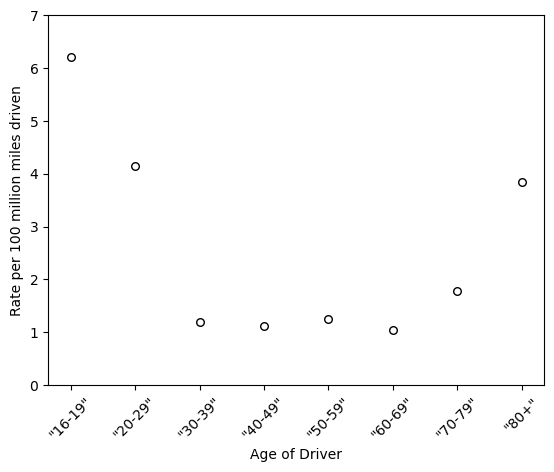

In [10]:
# Example 4: Two-way scatter plot

import matplotlib.pyplot as plt
import numpy as np

# Assign x and y
x=np.array([driveDF.age_cat])
y=np.array([driveDF.miles])

# Create plotting environment
fig, ax = plt.subplots()

# Plot xy scatter
ax.scatter(x, y, marker="o", 
           s=30,
           c='white',
           edgecolors='k')

# Set limits and labels
#ax.set(xlim=(70,100))
ax.set(ylim=(0,7))
ax.set_xlabel('Age of Driver')
ax.set_ylabel('Rate per 100 million miles driven')

# Use dataframe values for x-tick labels
plt.xticks(ticks=range(len(driveDF.age)), 
           labels=driveDF['age'],
           rotation=45)

# Show plot
plt.show()


If the code is correct you should the following x-y plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image08.png)

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image09.png)

## **Spearman Rank Correlation Coefficient**  

_From your textbook:_

Like other parametric techniques which assume that the populations we are sampling from are normally distributed, the Pearson correlation coefficient is sensitive to outlying values. We may be interested in calculating a measure of association that is more robust. One approach is to rank the two sets of outcomes x and y separately and calculate a **_rank correlation coefficient_**. This procedure – which results in a quantity known as the Spearman rank correlation coefficient – may be classified among the nonparametric methods presented in Chapter 13.  

The Spearman rank correlation coefficient, denoted $r_s$, is simply the Pearson correlation _r_ calculated for the ranked values of x and y. Therefore,  

$$ r_s = \frac{\sum_{i=1}^{n}(x_{ri} - \bar{x}_{r})(y_{ri} - \bar{y}_{r})}{\sqrt{[\sum_{i=1}^{n}(x_{ri} - \bar{x}_{r})^2][\sum_{i=1}^{n}(y_{ri} - \bar{y}_{r})^2]}} $$


where $x_{ri}$ and $y_{ri}$ are the ranks associated with the _i_ th subject rather than the actual observations. An equivalent method for computing $r_s$ is provided by the formula 

$$ r_s = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)} $$

>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 387). CRC Press. Kindle Edition. 

### Example 5: Spearman Rank Correlation Coefficient

The code in the cell below shows how to compute the Spearman Rank Correlation coefficient ($r_s$) for the DPT data.

In [11]:
print(x)

[[0 1 2 3 4 5 6 7]]


In [12]:
# Example 5: Spearman Rank Correlation Coefficient

import numpy as np
from scipy.stats import spearmanr

# Assign x and y
x=np.array(dptDF.immunized)
y=np.array(dptDF.under5)

# Create unicode for r sub s
r_sub_s = 'r\u209B'

# Compute Spearman Rank Correlation Coefficient
spearman_corr, p_value = spearmanr(x, y)

print("----Spearman Rank Correlation Coefficient----------")
print(f"Spearman Rank Correlation Coefficient ({r_sub_s}): {spearman_corr:.2f}")
print(f"P-value: {p_value:.4f}")


----Spearman Rank Correlation Coefficient----------
Spearman Rank Correlation Coefficient (rₛ): -0.50
P-value: 0.0258


If the code is correct, you should see the following output:

~~~text
----Spearman Rank Correlation Coefficient----------
Spearman Rank Correlation Coefficient (rₛ): -0.50
P-value: 0.0258
~~~

_From page 387 in your textbook:_


Suppose that we were to rank the percentages of children immunized against dpt and the under-5  mortality rates presented in Table 16.1 from smallest to largest, separately for each variable, assigning  average ranks to tied observations. The results are shown in Table 16.2, along with the difference in  ranks for each country, and the squares of these differences. Using the computational formula for rs,  the Spearman rank correlation coefficient is 

$$ r_s = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)} = 1 - \frac{6(1974.5)}{20(399)} = -0.49. $$


> Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 387). CRC Press. Kindle Edition. 


### **Exercise 5: Spearman Rank Correlation Coefficient**

The code in the cell below shows how to compute the Spearman Rank Correlation coefficient ($r_s$) for the DPT data. 

Use this code chunk to generate the x- and y-values:

~~~text
# Assign x and y
x=np.array(lungDF.fev)
y=np.array(lungDF.fvc)
~~~

In [13]:
# Example 5: Spearman Rank Correlation Coefficient

import numpy as np
from scipy.stats import spearmanr

# Assign x and y
x=np.array(lungDF.fev)
y=np.array(lungDF.fvc)

# Create unicode for r sub s
r_sub_s = 'r\u209B'

# Compute Spearman Rank Correlation Coefficient
spearman_corr, p_value = spearmanr(x, y)

print("----Spearman Rank Correlation Coefficient----------")
print(f"Spearman Rank Correlation Coefficient ({r_sub_s}): {spearman_corr:.2f}")
print(f"P-value: {p_value:.4f}")
print(" ")

----Spearman Rank Correlation Coefficient----------
Spearman Rank Correlation Coefficient (rₛ): 0.85
P-value: 0.0000
 


If the code is correct, you should see the following output:

~~~text
----Spearman Rank Correlation Coefficient----------
Spearman Rank Correlation Coefficient (rₛ): 0.85
P-value: 0.0000
~~~

Here the output from your **Exercise 3A** when you computed the Pearson Correlation Cofficient for the same data set: 

~~~text
----Pearson Correlation Coefficient----------
Mean forced ventilation (x̅): 3.78 liters
Mean forced lung capacity (y̅): 4.92 litters
Pearson correlation coefficient (r): 0.86
P-value: 0.0000
~~~

Comparing the results of the two correlation tests, you can see that the results are very similar. The Pearson Correlation Coefficient uses **_parametric_** statistics, the Spearman Rank Correlation Coefficient uses **_nonparametric_** statistics. As was discussed in Lesson_03_5 (Nonparamentric Statistics), for "well-behaved" data (i.e. normally distributed with no significant outliers), you would expect parametric and nonparametric procedures to give very similar results. 



![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_8_image10.png)

## **Lesson Turn-in**

When you have completed and run all of the code cells, create a PDF of your notebook and upload the **_PDF_** to your Lesson_03_9 assignment in Canvas for grading.
